<a href="https://colab.research.google.com/github/sharna33/CSE_3210_DSP/blob/main/2003009_CSE3209_Assignment_III.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🆔 2003009**

### **👉 Introduction**  
This document contains lab problems on Digital Signal Processing (DSP), including Discrete Fourier Transform (DFT), Discrete-Time Fourier Transform (DTFT), and Filtering. Python implementations are provided for each problem.

## **✅ Import Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

### **💭Question 1**  
**👉 Basic Signal Operations: Signal Generation and Transformations**   
Generate a discrete-time sine wave and perform the following operations:  
• Time Shifting: $x[n − k]$  
• Time Reversal: $x[−n]$   
• Time Scaling: $x[a · n]$

Original Signal:
 [ 0.00000000e+00  3.09016994e-01  5.87785252e-01  8.09016994e-01
  9.51056516e-01  1.00000000e+00  9.51056516e-01  8.09016994e-01
  5.87785252e-01  3.09016994e-01  1.22464680e-16 -3.09016994e-01
 -5.87785252e-01 -8.09016994e-01 -9.51056516e-01 -1.00000000e+00
 -9.51056516e-01 -8.09016994e-01 -5.87785252e-01 -3.09016994e-01
 -2.44929360e-16  3.09016994e-01  5.87785252e-01  8.09016994e-01
  9.51056516e-01  1.00000000e+00  9.51056516e-01  8.09016994e-01
  5.87785252e-01  3.09016994e-01  3.67394040e-16 -3.09016994e-01
 -5.87785252e-01 -8.09016994e-01 -9.51056516e-01 -1.00000000e+00
 -9.51056516e-01 -8.09016994e-01 -5.87785252e-01 -3.09016994e-01
 -4.89858720e-16  3.09016994e-01  5.87785252e-01  8.09016994e-01
  9.51056516e-01  1.00000000e+00  9.51056516e-01  8.09016994e-01
  5.87785252e-01  3.09016994e-01  6.12323400e-16 -3.09016994e-01
 -5.87785252e-01 -8.09016994e-01 -9.51056516e-01 -1.00000000e+00
 -9.51056516e-01 -8.09016994e-01 -5.87785252e-01 -3.09016994e-01
 -7.347

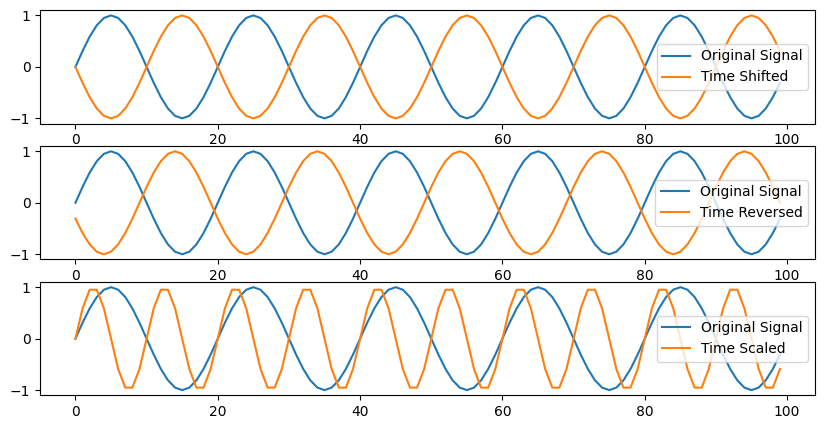

In [ ]:
fs = 100
T = 1 / fs
N = 100
n = np.arange(N)
f = 5
x = np.sin(2 * np.pi * f * n * T)
print("Original Signal:\n", x)

# Time Shifting
k = 10
x_shift = np.zeros(N)

for i in range(N):
    index = (i - k) % N
    x_shift[i] = x[index]

# Time Reversal
x_reverse = x[::-1]
print("Reversed Signal:\n", x_reverse)

# Time Scaling
a = 2
x_scale = np.sin(2 * np.pi * f * (a * n) * T)
print("Scaled Signal:\n", x_scale)

plt.figure(figsize=(10, 5))
plt.subplot(3, 1, 1)
plt.plot(n, x, label='Original Signal')
plt.plot(n, x_shift, label='Time Shifted')
plt.legend()
plt.subplot(3, 1, 2)
plt.plot(n, x, label='Original Signal')
plt.plot(n, x_reverse, label='Time Reversed')
plt.legend()
plt.subplot(3, 1, 3)
plt.plot(n, x, label='Original Signal')
plt.plot(n, x_scale[:N], label='Time Scaled')
plt.legend()
plt.show()

### **💭Question 2**  
**👉 Discrete Fourier Transform (DFT)**  
The DFT is given by:  


$X[k] = \sum_{n=0}^{N-1} x[n] e^{-j\frac{2\pi}{N}kn}$  


Implement DFT manually and compare it with numpy.fft.fft().

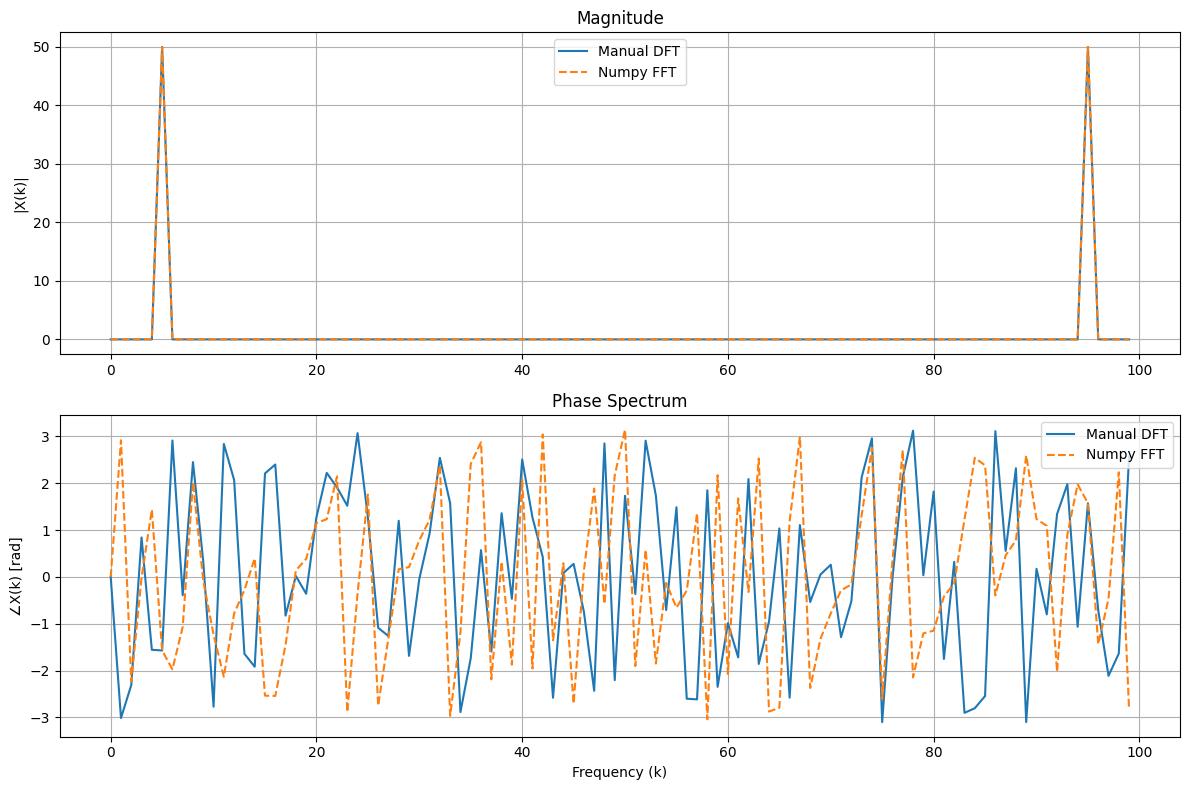

In [ ]:
def dft_manual(x):
    N = len(x)
    X = np.zeros(N, dtype=complex)
    for k in range(N):
        for n in range(N):
            X[k] += x[n] * np.exp(-2j * np.pi * k * n / N)
    return X

# Compute DFT manually and using numpy
X_manual = dft_manual(x)
X_numpy = np.fft.fft(x)

plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(np.abs(X_manual), label='Manual DFT')
plt.plot(np.abs(X_numpy), linestyle='dashed', label='Numpy FFT')
plt.title('Magnitude')
plt.ylabel('|X(k)|')
plt.grid(True)
plt.legend()

# Phase spectrum
plt.subplot(2, 1, 2)
plt.plot(np.angle(X_manual), label='Manual DFT')
plt.plot(np.angle(X_numpy), linestyle='dashed', label='Numpy FFT')
plt.title('Phase Spectrum')
plt.xlabel('Frequency (k)')
plt.ylabel('∠X(k) [rad]')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

### **💭Question 3**  
**👉 Discrete-Time Fourier Transform (DTFT)**   
The DTFT is computed as:  
$X(e^{jω}) =\sum_{n=−∞}^{∞}x[n]e^{−jωn}$

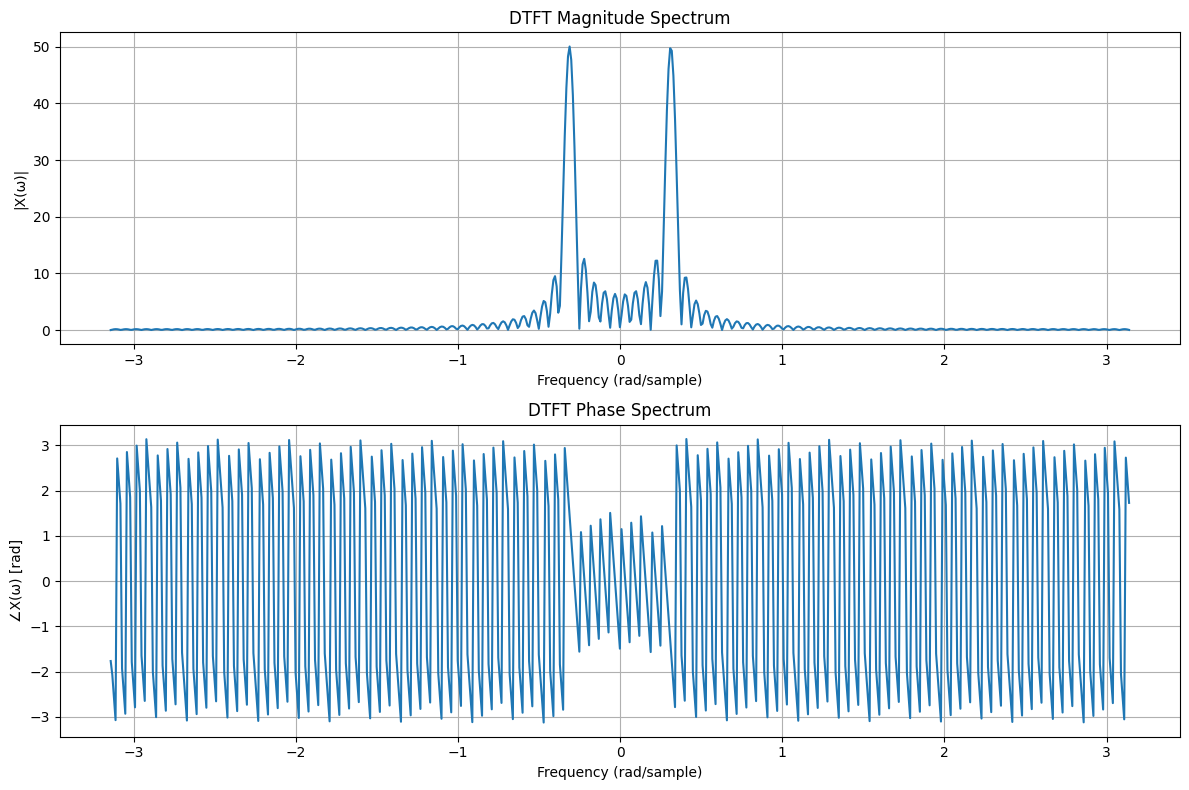

In [ ]:
def dtft(x, x_range=(-np.pi, np.pi), step=0.01):
    values = np.arange(x_range[0], x_range[1], step)
    X = np.zeros(len(values), dtype=complex)

    for i, k in enumerate(values):
        for n in range(len(x)):
            X[i] += x[n] * np.exp(-1j * k * n)

    return values, X

x_vals, dtft_vals = dtft(x)

plt.figure(figsize=(12, 8))

# Magnitude spectrum
plt.subplot(2, 1, 1)
plt.plot(x_vals, np.abs(dtft_vals))
plt.title('DTFT Magnitude Spectrum')
plt.xlabel('Frequency (rad/sample)')
plt.ylabel('|X(ω)|')
plt.grid(True)

# Phase spectrum
plt.subplot(2, 1, 2)
plt.plot(x_vals, np.angle(dtft_vals))
plt.title('DTFT Phase Spectrum')
plt.xlabel('Frequency (rad/sample)')
plt.ylabel('∠X(ω) [rad]')
plt.grid(True)

plt.tight_layout()
plt.show()

### **💭Question 4**  
**👉 Fast Fourier Transform (FFT) Efficiency**   
Compare execution times for manual DFT vs. FFT

In [ ]:
# Time manual DFT
start = time.time()
dft_manual(x)
manual_time = time.time() - start

# Time FFT
start = time.time()
np.fft.fft(x)
fft_time = time.time() - start

print(f"Manual DFT time: {manual_time:.6f} s")
print(f"FFT time: {fft_time:.6f} s")

Manual DFT time: 0.047447 s
FFT time: 0.000216 s


### **💭Question 5**  
**👉 Filtering in the Frequency Domain**  
Apply a low-pass filter in the frequency domain to remove high-frequency components

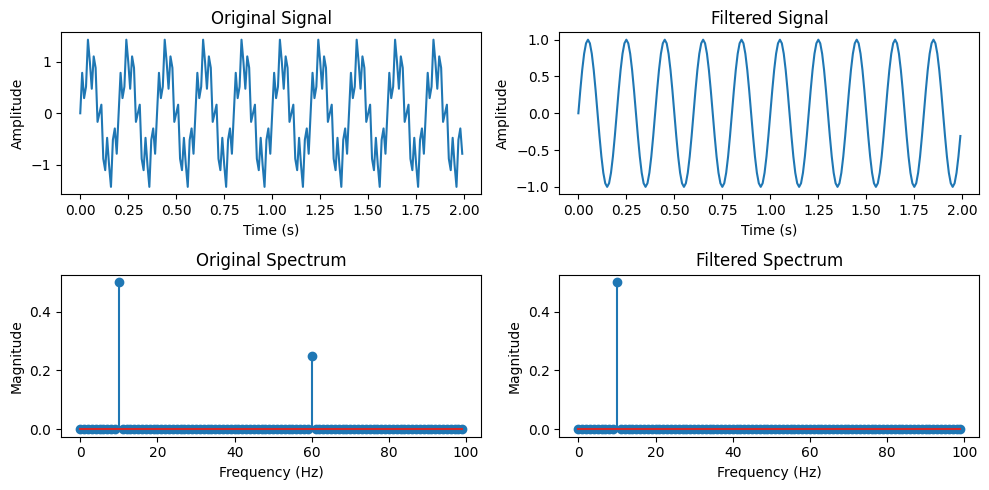

In [ ]:
fs = 200
duration = 2
t = np.linspace(0, duration, fs, endpoint=False)

# Create a signal with two frequency components (5 Hz and 30 Hz)
signal = np.sin(2*np.pi*5*t) + 0.5*np.sin(2*np.pi*30*t)

spectrum = np.fft.fft(signal)
frequencies = np.fft.fftfreq(len(signal), 1/fs)

# Apply low-pass filter
cutoff_freq = 10
filter_mask = np.abs(frequencies) <= cutoff_freq
filtered_spectrum = spectrum * filter_mask

# Inverse FFT to get filtered signal
filtered_signal = np.fft.ifft(filtered_spectrum).real

# Plotting
plt.figure(figsize=(10, 5))

plt.subplot(2, 2, 1)
plt.plot(t, signal)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Original Signal')

plt.subplot(2, 2, 2)
plt.plot(t, filtered_signal)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Filtered Signal')

plt.subplot(2, 2, 3)
positive_freq_mask = frequencies >= 0
plt.stem(frequencies[positive_freq_mask], np.abs(spectrum[positive_freq_mask])/len(signal))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Original Spectrum')

plt.subplot(2, 2, 4)
plt.stem(frequencies[positive_freq_mask], np.abs(filtered_spectrum[positive_freq_mask])/len(signal))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Filtered Spectrum')

plt.tight_layout()
plt.show()